In [2]:
using Pkg
Pkg.add("DFTK")
using DFTK

   Resolving package versions...


   Installed LinearMaps ─ v3.10.2


    Updating `~/.julia/environments/v1.9/Project.toml`
  [acf6eb54] + DFTK v0.6.9
    Updating `~/.julia/environments/v1.9/Manifest.toml`


  [ada6cbde] + Bravais v0.1.8
  [23470ee3] + Brillouin v0.5.13
  [b0b7db55] + ComponentArrays v0.13.14
  [acf6eb54] + DFTK v0.6.9
  [6bd331d2] + DftFunctionals v0.2.3
  [c3f9d41a] + DirectQhull v0.2.0
  [d9f16b24] + Functors v0.4.4
  [a9efe35a] + InteratomicPotentials v0.2.6
  [42fd0dbc] + IterativeSolvers v0.9.2
  [66e17ffc] + Libxc v0.3.15
  [7a12625a] + LinearMaps v3.10.2
  [da04e1cc] + MPI v0.20.11
  [3da0fdf6] + MPIPreferences v0.1.8
  [eebad327] + PkgVersion v0.3.2
  [f27b6e38] + Polynomials v3.2.13
⌅ [cb339c56] + PseudoPotentialIO v0.1.1
  [f2b01f46] + Roots v2.0.17
  [f761d5c5] + Spglib v0.6.1
⌅ [4093c41a] + StructHelpers v0.1.5
  [1d63c593] + LLVMOpenMP_jll v15.0.4+0
  [25af9330] + Libxc_GPU_jll v6.1.0+2
  [a56a6d9d] + Libxc_jll v6.1.0+0
  [7cb0a576] + MPICH_jll v4.1.2+0
  [f1f71cc9] + MPItrampoline_jll v5.3.1+0
  [9237b28f] + MicrosoftMPI_jll v10.1.3+4
  [fe0851c0] + OpenMPI_jll v4.1.5+0
⌅ [784f63db] + Qhull_jll v8.0.1003+0
  [ac4a9f1e] + spglib_jll v1.16.5+0
        Info Pac

Precompiling 

project...


  ✓ Polynomials → PolynomialsMutableArithmeticsExt
  ✓ ComponentArrays → ComponentArraysRecursiveArrayToolsExt
  ✓ LinearMaps


  ✓ DiffEqBase → DiffEqBaseMPIExt


  ✓ LinearMaps → LinearMapsSparseArraysExt


  ✓ ComponentArrays → ComponentArraysSciMLBaseExt


  ✓ LinearMaps → LinearMapsChainRulesCoreExt


  ✓ LinearMaps → LinearMapsStatisticsExt
  ✓ LinearSolve → LinearSolveIterativeSolversExt


  ✓ DFTK
  10 dependencies successfully precompiled in 49 seconds. 488 already precompiled.


In [6]:
# Define a simple 2D square lattice
a = 10.0  # Lattice constant
lattice = a / 2 * [1  1 0; 
                   1 -1 0; 
                   0  0 2]

3×3 Matrix{Float64}:
 5.0   5.0   0.0
 5.0  -5.0   0.0
 0.0   0.0  10.0

### Functionals supported by DFTK.jl

**LDA_X: Exchange functional**
- LDA_C_XALPHA: Slater's Xα correlation functional
- LDA_C_VWN: Vosko, Wilk, and Nusair correlation functional

**Generalized Gradient Approximation (GGA)**
- GGA_X_PBE
- GGA_C_PBE
- GGA_X_PW91
- GGA_C_PW91

In [24]:
# Define the atomic positions and species
H = ElementPsp(:H, psp=load_psp("hgh/lda/h-q1"))
atoms = [H, H]
positions = [ones(3)/8, -ones(3)/8]

2-element Vector{Vector{Float64}}:
 [0.125, 0.125, 0.125]
 [-0.125, -0.125, -0.125]

In [11]:
H = ElementPsp(:H, psp=load_psp("hgh/lda/h-q1"))
Si = ElementPsp(:Si, psp=load_psp("hgh/lda/si-q4"))
mixed_atoms = [H, Si]
positions = [ones(3)/8, -ones(3)/8]

2-element Vector{Vector{Float64}}:
 [0.125, 0.125, 0.125]
 [-0.125, -0.125, -0.125]

In [25]:
# Create the crystal
model = model_LDA(lattice, atoms, positions)

Model(lda_x+lda_c_pw, 3D):
    lattice (in Bohr)    : [0         , 5.13      , 5.13      ]
                           [5.13      , 0         , 5.13      ]
                           [5.13      , 5.13      , 0         ]
    unit cell volume     : 270.01 Bohr³

    atoms                : H₂
    atom potentials      : ElementPsp(H, psp="hgh/lda/h-q1")
                           ElementPsp(H, psp="hgh/lda/h-q1")

    num. electrons       : 2
    spin polarization    : none
    temperature          : 0 Ha

    terms                : Kinetic()
                           AtomicLocal()
                           AtomicNonlocal()
                           Ewald()
                           PspCorrection()
                           Hartree()
                           Xc(DftFunctionals.Functional[lda_x, lda_c_pw])

In [26]:
Pkg.add("Unitful")
Pkg.add("UnitfulAtomic")

   Resolving package versions...


    Updating `~/.julia/environments/v1.9/Project.toml`
  [1986cc42] + Unitful v1.14.0
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


    Updating `~/.julia/environments/v1.9/Project.toml`
  [a7773ee8] + UnitfulAtomic v1.0.0
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [27]:
using DFTK
using Unitful
using UnitfulAtomic
using LinearAlgebra

# Define the convergence parameters (these should be increased in production)
L = 20  # height of the simulation box
kgrid = [6, 6, 1]
Ecut = 15
temperature = 1e-3

# Define the geometry and pseudopotential
a = 4.66  # lattice constant
a1 = a*[1/2,-sqrt(3)/2, 0]
a2 = a*[1/2, sqrt(3)/2, 0]
a3 = L*[0  , 0        , 1]
lattice = [a1 a2 a3]
C1 = [1/3,-1/3,0.0]  # in reduced coordinates
C2 = -C1
positions = [C1, C2]
C = ElementPsp(:C, psp=load_psp("hgh/pbe/c-q4"))
atoms = [C, C]

# Run SCF
model = model_PBE(lattice, atoms, positions; temperature)
basis = PlaneWaveBasis(model; Ecut, kgrid)
scfres = self_consistent_field(basis)

n     Energy            log10(ΔE)   log10(Δρ)   Diag   Δtime
---   ---------------   ---------   ---------   ----   ------
  1   -11.15664813397                   -0.60    6.0         


  2   -11.16018195720       -2.45       -1.30    1.0    135ms


  3   -11.16039622741       -3.67       -2.33    2.1    147ms


  4   -11.16041675843       -4.69       -3.27    3.0    185ms


  5   -11.16041704612       -6.54       -3.42    3.1    199ms


  6   -11.16041704834       -8.65       -3.57    1.0    200ms


  7   -11.16041704969       -8.87       -3.80    1.0    102ms


  8   -11.16041705074       -8.98       -4.17    1.7    126ms


  9   -11.16041705127       -9.28       -4.54    2.1    148ms


 10   -11.16041705139       -9.91       -4.92    2.1    287ms


 11   -11.16041705144      -10.35       -5.27    2.9    212ms


 12   -11.16041705145      -10.91       -5.84    2.9    216ms


 13   -11.16041705145      -12.01       -6.62    3.0    212ms


(ham = Hamiltonian(PlaneWaveBasis(model = Model(gga_x_pbe+gga_c_pbe, spin_polarization = :none), Ecut = 15.0 Ha, kgrid = [6, 6, 1]), HamiltonianBlock[DFTK.DftHamiltonianBlock(PlaneWaveBasis(model = Model(gga_x_pbe+gga_c_pbe, spin_polarization = :none), Ecut = 15.0 Ha, kgrid = [6, 6, 1]), KPoint([     0,      0,      0], spin = 1, num. G vectors =  1025), Any[DFTK.FourierMultiplication{Float64, Vector{Float64}}(PlaneWaveBasis(model = Model(gga_x_pbe+gga_c_pbe, spin_polarization = :none), Ecut = 15.0 Ha, kgrid = [6, 6, 1]), KPoint([     0,      0,      0], spin = 1, num. G vectors =  1025), [0.0, 1.2119833239501383, 4.847933295800553, 10.907849915551244, 10.907849915551244, 4.847933295800553, 1.2119833239501383, 1.2119833239501383, 3.635949971850415, 8.483883267650967  …  8.533231289656415, 14.593147909407106, 14.593147909407106, 8.533231289656413, 1.261331345955585, 1.261331345955585, 3.685297993855862, 8.533231289656415, 8.533231289656413, 3.685297993855862]), DFTK.RealSpaceMultiplicat

In [ ]:
## DFT comparison
## SCF comparison 

### Comparing SCF with Direct Minimization

In [14]:
using DFTK
using LinearAlgebra

a = 10.26  # Silicon lattice constant in Bohr
lattice = a / 2 * [[0 1 1.];
                   [1 0 1.];
                   [1 1 0.]]
Si = ElementPsp(:Si, psp=load_psp("hgh/lda/Si-q4"))
atoms     = [Si, Si]
positions = [ones(3)/8, -ones(3)/8]

model = model_LDA(lattice, atoms, positions)
basis = PlaneWaveBasis(model; Ecut=5, kgrid=[3, 3, 3])

# Convergence we desire in the density
tol = 1e-6

1.0e-6

In [15]:
scfres_scf = self_consistent_field(basis; tol);

n     Energy            log10(ΔE)   log10(Δρ)   Diag   Δtime
---   ---------------   ---------   ---------   ----   ------
  1   -7.846895072976                   -0.70    4.8         


  2   -7.852332705080       -2.26       -1.53    1.0    284ms


  3   -7.852615835175       -3.55       -2.55    1.2   39.7ms


  4   -7.852645998771       -4.52       -2.89    2.5   34.0ms


  5   -7.852646521125       -6.28       -3.21    1.0   41.5ms


  6   -7.852646679719       -6.80       -4.00    1.2    201ms


  7   -7.852646686223       -8.19       -5.29    1.2   35.7ms


  8   -7.852646686725       -9.30       -5.53    3.0   65.0ms


  9   -7.852646686730      -11.33       -6.57    1.0   35.1ms


In [16]:
scfres_dm = direct_minimization(basis; tol=tol^2);

Iter     Function value   Gradient norm 
     0     1.399765e+01     3.485114e+00


 * time: 0.025983095169067383


     1     1.487936e+00     1.806215e+00
 * time: 0.4618110656738281


     2    -1.494453e+00     2.142461e+00
 * time: 0.472257137298584


     3    -3.759907e+00     1.674927e+00
 * time: 0.4864969253540039


     4    -5.080046e+00     1.655887e+00
 * time: 0.5014560222625732


     5    -6.767562e+00     1.091294e+00
 * time: 0.5165810585021973


     6    -6.795244e+00     1.452381e+00
 * time: 0.5327179431915283


     7    -7.517370e+00     9.225509e-01
 * time: 0.5428469181060791


     8    -7.600596e+00     9.536334e-01
 * time: 0.5678260326385498


     9    -7.798627e+00     2.752731e-01
 * time: 0.5774791240692139


    10    -7.830685e+00     1.009815e-01
 * time: 0.587644100189209


    11    -7.842988e+00     8.046365e-02
 * time: 0.5983850955963135


    12    -7.848323e+00     3.997235e-02
 * time: 0.6090819835662842


    13    -7.850502e+00     3.645681e-02
 * time: 0.6191830635070801


    14    -7.851963e+00     1.830897e-02
 * time: 0.6298480033874512


    15    -7.852360e+00     9.130495e-03
 * time: 0.6401150226593018


    16    -7.852540e+00     4.757299e-03
 * time: 0.6507871150970459


    17    -7.852612e+00     4.722339e-03
 * time: 0.6616201400756836


    18    -7.852635e+00     2.059978e-03
 * time: 0.6723480224609375


    19    -7.852643e+00     7.988405e-04
 * time: 0.6949341297149658


    20    -7.852646e+00     8.377079e-04
 * time: 0.706287145614624


    21    -7.852646e+00     3.569599e-04
 * time: 0.7172060012817383


    22    -7.852647e+00     1.517324e-04
 * time: 0.7288651466369629


    23    -7.852647e+00     1.469502e-04
 * time: 0.7430319786071777


    24    -7.852647e+00     5.688961e-05
 * time: 0.7561020851135254


    25    -7.852647e+00     3.752278e-05
 * time: 0.7702829837799072


    26    -7.852647e+00     2.347320e-05
 * time: 0.7820971012115479


    27    -7.852647e+00     1.547258e-05
 * time: 0.7932310104370117


    28    -7.852647e+00     6.529154e-06
 * time: 0.8059589862823486


    29    -7.852647e+00     3.462886e-06
 * time: 0.8176159858703613


    30    -7.852647e+00     2.434959e-06
 * time: 0.8389830589294434


    31    -7.852647e+00     1.680156e-06
 * time: 0.8498549461364746


    32    -7.852647e+00     1.054574e-06
 * time: 0.8638031482696533


    33    -7.852647e+00     5.878235e-07
 * time: 0.8765130043029785


    34    -7.852647e+00     3.923820e-07
 * time: 0.8889539241790771


    35    -7.852647e+00     2.430809e-07
 * time: 0.9010751247406006


    36    -7.852647e+00     1.072815e-07
 * time: 0.9133009910583496


    37    -7.852647e+00     4.640288e-08
 * time: 0.9255311489105225


    38    -7.852647e+00     3.118984e-08
 * time: 0.9376819133758545


    39    -7.852647e+00     1.628634e-08
 * time: 0.9497311115264893


    40    -7.852647e+00     9.538163e-09
 * time: 0.9664840698242188


    41    -7.852647e+00     8.391945e-09
 * time: 1.011672019958496


    42    -7.852647e+00     4.007291e-09
 * time: 1.0413990020751953


    43    -7.852647e+00     4.007125e-09
 * time: 1.0802209377288818


### Monitoring convergence

In [28]:
Pkg.add("ASEconvert")

   Resolving package versions...


   Installed UnsafePointers ─ v1.0.0
   Installed MicroMamba ───── v0.1.13


   Installed micromamba_jll ─ v1.4.1+0
   Installed CondaPkg ─────── v0.2.18
   Installed StructTypes ──── v1.10.0
   Installed ASEconvert ───── v0.1.5
   Installed JSON3 ────────── v1.13.1
   Installed PythonCall ───── v0.9.13


    Updating `~/.julia/environments/v1.9/Project.toml`
  [3da9722f] + ASEconvert v0.1.5
    Updating `~/.julia/environments/v1.9/Manifest.toml`


  [3da9722f] + ASEconvert v0.1.5
  [992eb4ea] + CondaPkg v0.2.18
  [0f8b85d8] + JSON3 v1.13.1
  [0b3b1443] + MicroMamba v0.1.13
  [6099a3de] + PythonCall v0.9.13
  [856f2bd8] + StructTypes v1.10.0
  [e17b2a0c] + UnsafePointers v1.0.0
⌅ [f8abcde7] + micromamba_jll v1.4.1+0
        Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated -m`


Precompiling 

project...


  ✓ UnsafePointers


  ✓ micromamba_jll
  ✓ StructTypes


  ✓ MicroMamba


  ✓ JSON3


  ✓ CondaPkg


  ✓ PythonCall


  ✓ ASEconvert
  8 dependencies successfully precompiled in 64 seconds. 498 already precompiled.
  2 dependencies had warnings during precompilation:
┌ ASEconvert [3da9722f-58c2-4165-81be-b4d7253e8fd2]
│      CondaPkg Found dependencies: /Users/leticiamadureira/.julia/packages/ASEconvert/CNQ1A/CondaPkg.toml
│      CondaPkg Found dependencies: /Users/leticiamadureira/.julia/packages/PythonCall/1f5yE/CondaPkg.toml
│      CondaPkg Resolving changes
│               + ase
│               + python
│      CondaPkg Creating environment
│               │ /Users/leticiamadureira/.julia/artifacts/7cfea9db5b54ceb7d9109c8728914c9459303a75/bin/micromamba
│               │ -r /Users/leticiamadureira/micromamba
│               │ create
│               │ -y
│               │ -p /Users/leticiamadureira/.julia/environments/v1.9/.CondaPkg/env
│               │ --override-channels
│               │ --no-channel-priority
│               │ ase[version='>=3.22,<4']
│               │ python[version='>=3.7,<4',

### Using with Atomic Simulation Environment (ASE)

In [29]:
using DFTK
using ASEconvert

system = pyconvert(AbstractSystem, ase.build.bulk("Si"))
model  = model_LDA(attach_psp(system; Si="hgh/pbe/si-q4.hgh"))
basis  = PlaneWaveBasis(model; Ecut=5, kgrid=[3, 3, 3]);

In [30]:
using Plots
p = plot(yaxis=:log)
density_differences = Float64[];

In [1]:
using LinearAlgebra

function plot_callback(info)
    if info.stage == :finalize
        plot!(p, density_differences, label="|ρout - ρin|", markershape=:x)
    else
        push!(density_differences, norm(info.ρout - info.ρin))
    end
    info
end

plot_callback (generic function with 1 method)

In [3]:
using DFTK

In [6]:
callback = DFTK.ScfDefaultCallback() ∘ plot_callback;

ErrorException: type #callback#602 has no field stage

In [7]:
scfres = self_consistent_field(basis; tol=1e-5, callback);

UndefVarError: UndefVarError: `basis` not defined

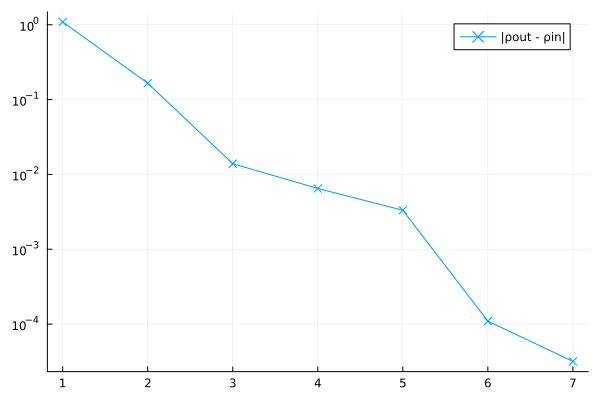

In [33]:
p